In [20]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, Subset

from dataset import transform

In [2]:
with open("dataset_6_1_168/dataset.json", "r") as f:
    j = json.load(f)

In [4]:
df = pd.DataFrame(j)

In [5]:
df["game_id"] = df["file_name"].apply(lambda x: x.split("_")[1])
df["push_date"] = pd.to_datetime(df["file_name"].apply(lambda x: x.split("_")[2]))
df["gamer_id"] = df["file_name"].apply(lambda x: x.split("_")[3].replace(".csv", ""))

In [12]:
idx = 4500

t = df.t[idx]
y = df.y[idx]
file_name = df.file_name[idx]
data_path = "./dataset_6_1_168"

t, y, file_name

(1,
 0,
 'logs_2097_2021-12-16_7fd9dd710228497cb8fd9b81ce95464590e4c0a9e8e3343bb1d8d93eaa576f50.csv')

In [43]:
data = pd.read_csv(os.path.join(data_path, file_name))
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
emb = transform(data.iloc[:, 0])
login = torch.tensor(data.login).unsqueeze(1)
crud = torch.tensor(data.crud).unsqueeze(1)

X = torch.cat([emb, login, crud], axis=1)
X.shape

torch.Size([1008, 6])

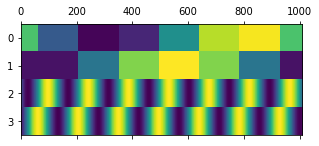

In [40]:
plt.matshow(emb.T, aspect=100)
plt.show()